In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier

In [3]:
#df = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")

In [4]:
#df.head()

In [5]:
#print(df.shape)
#print(df.describe())

In [6]:
#X = df.drop(['Made_Purchase'], axis = 1)
#Y = df["Made_Purchase"]
#print(X.shape)
#print(Y.shape)

In [7]:
#X.isnull().values.any()
#X.isnull().sum()
#X.isnull().sum().sum()

In [8]:
#df = df.dropna(axis=1)
#df = df.reset_index(drop=True)

In [9]:
#X.isnull().sum().sum()

In [10]:
#from sklearn.impute import SimpleImputer
#my_imputer = SimpleImputer()
#data_with_imputed_values = my_imputer.fit_transform(df)

In [11]:
#dummy_clf = DummyClassifier(strategy="most_frequent")
#dummy_clf.fit(X,Y)
#prediction= dummy_clf.predict(X)

In [12]:
#dummy_clf.score(X, Y)

In [13]:
#submission = pd.DataFrame(columns = ['id','Made_Purchase'])
#submission['id']=[i for i in range(len(prediction))]
#submission['Made_Purchase'] = prediction
#submission.to_csv('submission.csv', index= False)

In [14]:
#submission.head()

In [15]:
df = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")

In [16]:
# Handle missing values using interpolation
#df.interpolate(method='zero', inplace=True)

In [17]:

df.isnull().sum().sum()

2923

In [18]:
#dividing the data into numerical and categorical
numerical = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(exclude = np.number)

In [19]:
# Handle missing values using interpolation
#df.interpolate(method='nearest', columns = categorical.columns, inplace=True)

In [20]:
#remove the null values from the data set and replace them with the most frequent of the column
#df = df.fillna(df.mode().iloc[0])

#----------------------------------------------
#from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with strategy='mean'
#imputer = SimpleImputer(strategy='mean')
#df_imputed = imputer.fit_transform(df)

# Convert the NumPy array back to a Pandas DataFrame  as maybe simpleimputer might give numpy output
#df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

#------
#from sklearn.impute import KNNImputer

# Create KNN imputer object
#imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Impute missing values
#X_imputed = imputer.fit_transform(X)

In [21]:
# Handle missing values using interpolation
#df.interpolate(method='polynomial', order = 9, inplace=True)

In [22]:
df.isnull().sum().sum()

2923

In [23]:

##trying interpolation
#numerical simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(numerical)
imputed_numerical = imputer.transform(numerical)
imputed_numerical = pd.DataFrame(imputed_numerical, columns=numerical.columns)

#categorical imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(categorical)
imputed_categorical = imputer.transform(categorical)
imputed_categorical = pd.DataFrame(imputed_categorical, columns=categorical.columns)


In [24]:

merged = pd.concat([imputed_numerical, imputed_categorical], axis=1)
merged.head()


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Zone,Type of Traffic,WeekendPurchase,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,9.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Other,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,4.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Married,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,1.0,4.0,1.0,Feb,Returning_Visitor,Female,ALL,Others,Married,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,3.0,3.0,0.0,Feb,Returning_Visitor,Male,ALL,Diploma,Single,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,5.0,1.0,Feb,Returning_Visitor,Male,Deny,Diploma,Other,False


In [25]:
df=merged

In [26]:
df.isnull().sum().sum()

0

In [27]:
#One hot encoding for categorical data
df = pd.get_dummies(df, columns = categorical.columns, drop_first = True)

In [28]:
X = df.drop(['Made_Purchase_True'], axis = 1)
Y = df["Made_Purchase_True"]
print(X.shape)
print(Y.shape)

(14731, 35)
(14731,)


In [29]:
'''
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=12)
selector.fit(X, Y)
X_new = selector.transform(X)
'''

'\n#feature selection\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import mutual_info_classif\n\nselector = SelectKBest(mutual_info_classif, k=12)\nselector.fit(X, Y)\nX_new = selector.transform(X)\n'

In [30]:
'''
X_new=pd.DataFrame(X_new)
X_new.info()
'''

'\nX_new=pd.DataFrame(X_new)\nX_new.info()\n'

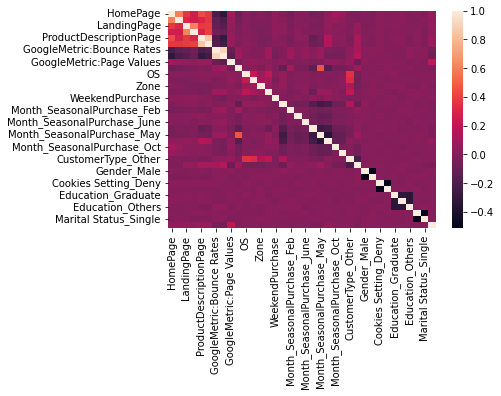

In [31]:
#plot correlaation matrix with labels
import seaborn as sns
import matplotlib.pyplot as plt
#creating a correlation matrix
corr_matrix = df.corr()
#plotting the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [32]:
#test train split
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create the stratified shuffle split object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in strat_split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [34]:
X_train.shape

(11784, 35)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=10, random_state=42)
xgb.fit(X_train, Y_train)

# Fit the Random Forest model with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
rf_grid = GridSearchCV(rf, param_grid=params, cv=5)
rf_grid.fit(X_train, Y_train)

# Fit the Gradient Boosting model with hyperparameter tuning
gb = GradientBoostingClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid = GridSearchCV(gb, param_grid=params, cv=5)
gb_grid.fit(X_train, Y_train)


# Get the predictions from both models
rf_preds = rf_grid.predict(X_test)
gb_preds = gb_grid.predict(X_test)

# Combine the predictions from both models using voting
ensemble_preds = np.round((rf_preds + gb_preds) / 2).astype(int)

# Calculate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(Y_test, ensemble_preds)
print('Ensemble accuracy:', ensemble_accuracy)

Ensemble accuracy: 0.6620291822192059


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

distributions = {'penalty': ['l1', 'l2'], }  #'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
lr = LogisticRegression(solver='saga', random_state=42, tol=0.01, max_iter=100)
rsc = RandomizedSearchCV(lr, param_distributions=distributions, random_state=42)
rsc.fit(X_train, Y_train)
rsc.score(X_test,Y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


0.6260604004071938

In [37]:
'''
from sklearn.ensemble import StackingClassifier  #

stacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgb', xgb) ], final_estimator=LogisticRegression(random_state=42))
stacking.fit(X_train, Y_train)
stacking.score(X_test, Y_test)
'''

"\nfrom sklearn.ensemble import StackingClassifier  #\n\nstacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgb', xgb) ], final_estimator=LogisticRegression(random_state=42))\nstacking.fit(X_train, Y_train)\nstacking.score(X_test, Y_test)\n"

In [38]:
'''
from sklearn.ensemble import StackingClassifier  #

stacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('gb', gb_grid) ], final_estimator=rf_grid)
stacking.fit(X_train, Y_train)
stacking.score(X_test, Y_test)
'''

"\nfrom sklearn.ensemble import StackingClassifier  #\n\nstacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('gb', gb_grid) ], final_estimator=rf_grid)\nstacking.fit(X_train, Y_train)\nstacking.score(X_test, Y_test)\n"

In [39]:
'''
from sklearn.ensemble import StackingClassifier  #

stacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('rf_grid', rf_grid),('xgb', xgb), ('gb_grid', gb_grid) ], final_estimator=rf_grid)
stacking.fit(X_train, Y_train)
stacking.score(X_test, Y_test)
'''

"\nfrom sklearn.ensemble import StackingClassifier  #\n\nstacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('rf_grid', rf_grid),('xgb', xgb), ('gb_grid', gb_grid) ], final_estimator=rf_grid)\nstacking.fit(X_train, Y_train)\nstacking.score(X_test, Y_test)\n"

In [40]:
'''
from sklearn.ensemble import StackingClassifier  #

stacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('rf_grid', rf_grid), ('gb_grid', gb_grid) ,('xgb', xgb) ], final_estimator=rf_grid)
stacking.fit(X_train, Y_train)
stacking.score(X_test, Y_test)
'''

"\nfrom sklearn.ensemble import StackingClassifier  #\n\nstacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('rf_grid', rf_grid), ('gb_grid', gb_grid) ,('xgb', xgb) ], final_estimator=rf_grid)\nstacking.fit(X_train, Y_train)\nstacking.score(X_test, Y_test)\n"

In [41]:
from sklearn.ensemble import StackingClassifier  #

stacking = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('rf_grid', rf_grid), ('gb_grid', gb_grid) ,('xgb', xgb) ], final_estimator=rf_grid)
stacking.fit(X_train, Y_train)
stacking.score(X_test, Y_test)
#0.7577197149643705
#0.76 - without cv
#0.7631489650492026 with new imputation strategy

0.7631489650492026

In [42]:
df_test = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
# Handle missing values using interpolation
'''
df_test.interpolate(method='polynomial',order=9, inplace=True)
print(df_test.isnull().sum().sum())
#dividing the data into numerical and categorical
numerical = df_test.select_dtypes(include = np.number)
categorical = df_test.select_dtypes(exclude = np.number)
#One hot encoding for categorical data
df_test = pd.get_dummies(df_test, columns = categorical.columns, drop_first = True)
'''

"\ndf_test.interpolate(method='polynomial',order=9, inplace=True)\nprint(df_test.isnull().sum().sum())\n#dividing the data into numerical and categorical\nnumerical = df_test.select_dtypes(include = np.number)\ncategorical = df_test.select_dtypes(exclude = np.number)\n#One hot encoding for categorical data\ndf_test = pd.get_dummies(df_test, columns = categorical.columns, drop_first = True)\n"

In [43]:
#dividing the data into numerical and categorical
numericalt = df_test.select_dtypes(include = np.number)
categoricalt = df_test.select_dtypes(exclude = np.number)
print('1')

1


In [44]:

##trying interpolation
#numerical simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(numericalt)
imputed_numericalt = imputer.transform(numericalt)
imputed_numericalt = pd.DataFrame(imputed_numericalt, columns=numericalt.columns)

#categorical imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(categoricalt)
imputed_categoricalt = imputer.transform(categoricalt)
imputed_categoricalt = pd.DataFrame(imputed_categoricalt, columns=categoricalt.columns)
print('1')

1


In [45]:

mergedt = pd.concat([imputed_numericalt, imputed_categoricalt], axis=1)
mergedt.head()


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Single
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,1.0,2.0,0.0,Feb,Returning_Visitor,Not Specified,ALL,Graduate,Married
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,1.0,3.0,0.0,Feb,Returning_Visitor,Female,Required,Diploma,Other
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Required,Graduate,Other
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,4.0,3.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Other


In [46]:
df_test = mergedt
print('1')

1


In [47]:

#One hot encoding for categorical data
df_test = pd.get_dummies(df_test, columns = categoricalt.columns, drop_first = True)
print('1')

1


In [48]:
print(df_test.isnull().sum().sum())

0


In [49]:
prediction = stacking.predict(df_test)

In [50]:
#prediction = model.predict(df_test_new)

In [51]:
prediction=prediction.astype(np.bool)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [52]:
prediction

array([False, False, False, ..., False,  True,  True])

In [53]:
submission = pd.DataFrame(columns = ['id','Made_Purchase'])
submission['id']=[i for i in range(len(prediction))]
submission['Made_Purchase'] = prediction
submission.to_csv('submission.csv', index= False)
print("1")

1
